# **STEP 1: Retrieving data from DHIS2**


In [ ]:
# Loading the CSV file into a dataframe.
df <- read.csv("1b_data_before_imputing_missing_values.csv")

# Displaying the first 24 rows of the dataframe.
print(head(df, 24))

   periodid periodname periodcode perioddescription Ngelehun.CHC Jembe.CHC
1    202301     Jan-23     202301                NA          119        48
2    202302     Feb-23     202302                NA           NA        48
3    202303     Mar-23     202303                NA            3        89
4    202304     Apr-23     202304                NA           NA        49
5    202305     May-23     202305                NA            2        42
6    202306     Jun-23     202306                NA            2        71
7    202307     Jul-23     202307                NA            2       101
8    202308     Aug-23     202308                NA            1        64
9    202309     Sep-23     202309                NA           NA        87
10   202310     Oct-23     202310                NA           NA        55
11   202311     Nov-23     202311                NA           NA        66
12   202312     Dec-23     202312                NA           NA        52
13   202401     Jan-24   


# **STEP 2: Installing and Loading required packages**

In [ ]:
install.packages("seastests")
library(seastests)
install.packages("forecast")
library(forecast)
install.packages("tidyverse")
library(tidyverse)
install.packages("tseries")
library(tseries)
install.packages("MLmetrics")
library(MLmetrics)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘xts’, ‘zoo’, ‘forecast’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to beco

**Explanation:** The 'seastests' package is used for seasonal analysis and testing of time series data. The 'forecast' package is used for forecasting and visualization of time series data. The 'tidyverse' package provides a collection of tools for data manipulation and visualization. The 'tseries' package is used for time series analysis, including stationarity tests. Lastly, the 'MLmetrics' package provides machine learning metrics for evaluating model performance.

# **STEP 3: Imputing Missing Values using 3-Period Simple Moving Average.**

In [ ]:
# Loading the CSV file into a dataframe.
data <- read.csv('1b_data_before_imputing_missing_values.csv')

# Filling missing values using 3-period simple moving average with initial averaging for the first missing value
fill_missing_values_with_sma <- function(data, column_name) {
  for (i in 1:nrow(data)) {
    if (is.na(data[i, column_name])) {
      # Special handling for the first missing value (use initial available values)
      if (i == 2) {
        sma <- round(mean(c(data[1, column_name], 0, data[3, column_name]), na.rm = TRUE))
        data[i, column_name] <- sma
      } else if (i > 2) {
        # Calculating the 3-period simple moving average for the rest of the missing values
        sma <- round(mean(c(data[i-1, column_name], data[i-2, column_name], data[i-3, column_name]), na.rm = TRUE))
        data[i, column_name] <- sma
      }
    }
  }
  return(data)
}

# Filling the missing values for 'Ngelehun CHC' using 3-period simple moving average with specific logic
data_filled <- fill_missing_values_with_sma(data, "Ngelehun.CHC")

# Saving the updated dataset to a new CSV file
write.csv(data_filled, '1b_data_after_imputing_missing_values.csv', row.names = FALSE)
print(head(data_filled, 24))

   periodid periodname periodcode perioddescription Ngelehun.CHC Jembe.CHC
1    202301     Jan-23     202301                NA          119        48
2    202302     Feb-23     202302                NA           41        48
3    202303     Mar-23     202303                NA            3        89
4    202304     Apr-23     202304                NA           54        49
5    202305     May-23     202305                NA            2        42
6    202306     Jun-23     202306                NA            2        71
7    202307     Jul-23     202307                NA            2       101
8    202308     Aug-23     202308                NA            1        64
9    202309     Sep-23     202309                NA            2        87
10   202310     Oct-23     202310                NA            2        55
11   202311     Nov-23     202311                NA            2        66
12   202312     Dec-23     202312                NA            2        52
13   202401     Jan-24   

# **STEP 4: Creating Time Series for Ngelehun CHC and Jembe CHC**



In [ ]:
# Converting Ngelehun.CHC and Jembe.CHC columns to numeric.
data_filled$Ngelehun.CHC <- as.numeric(data_filled$Ngelehun.CHC)
data_filled$Jembe.CHC <- as.numeric(data_filled$Jembe.CHC)

# Creating time series objects for Ngelehun.CHC and Jembe.CHC with monthly frequency from Jan 2023 to Dec 2024.
data_ts_ngelehun <- ts(data_filled$Ngelehun.CHC, start = c(2023, 1), end=c(2024, 12), frequency = 12)
data_ts_jembe <- ts(data_filled$Jembe.CHC, start = c(2023, 1), end=c(2024, 12), frequency = 12)

# Displaying the created time series objects.
data_ts_ngelehun
data_ts_jembe

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,119,41,3,54,2,2,2,1,2,2,2,2
2024,119,6,17,7,13,14,13,7,14,51,24,30


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,48,48,89,49,42,71,101,64,87,55,66,52
2024,48,48,49,89,42,71,101,64,87,66,55,52


# **STEP 5: Plot Monthly Patient Referrals for Ngelehun CHC and Jembe CHC**

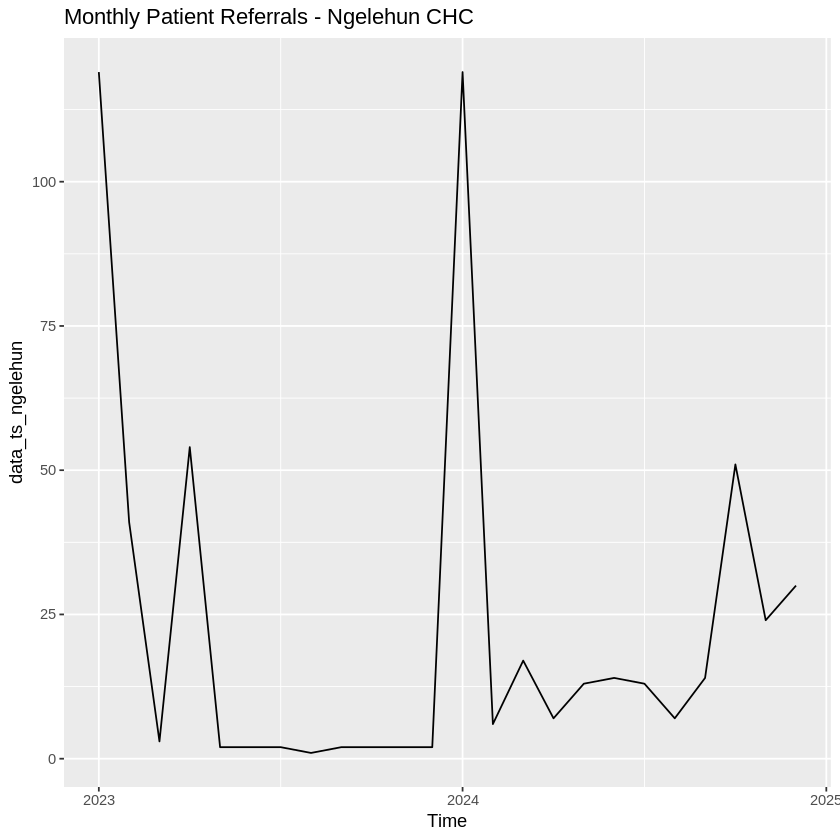

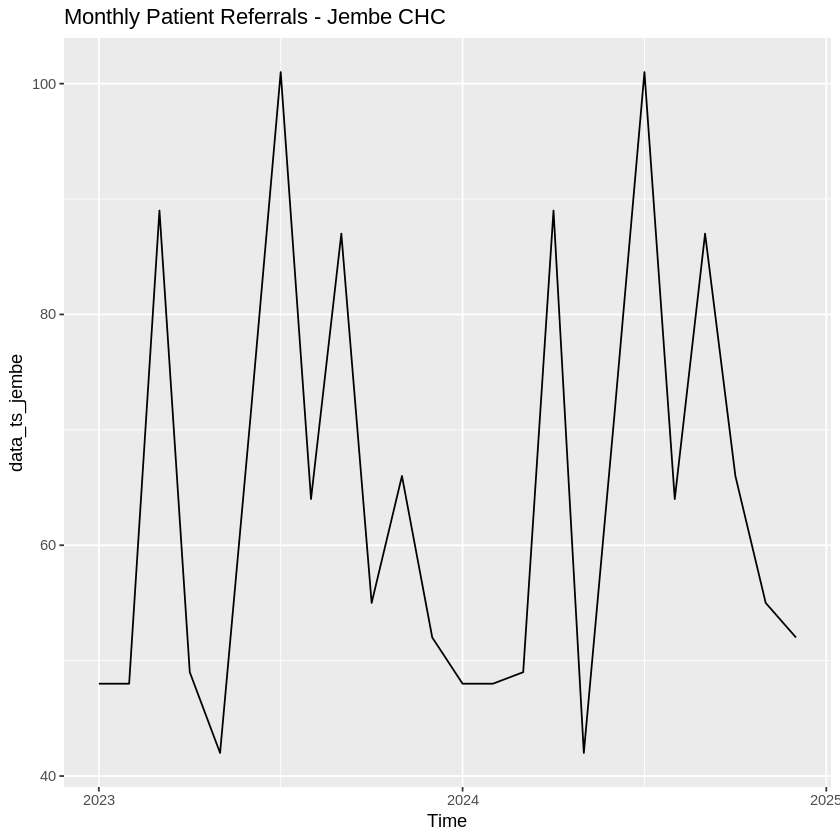

In [ ]:
# Ploting the time series for Ngelehun CHC referrals with a title.
autoplot(data_ts_ngelehun) + ggtitle("Monthly Patient Referrals - Ngelehun CHC")

# Ploting the time series for Jembe CHC referrals with a title.
autoplot(data_ts_jembe) + ggtitle("Monthly Patient Referrals - Jembe CHC")

# **STEP 6 - Decompose Time Series for Ngelehun CHC and Jembe CHC**

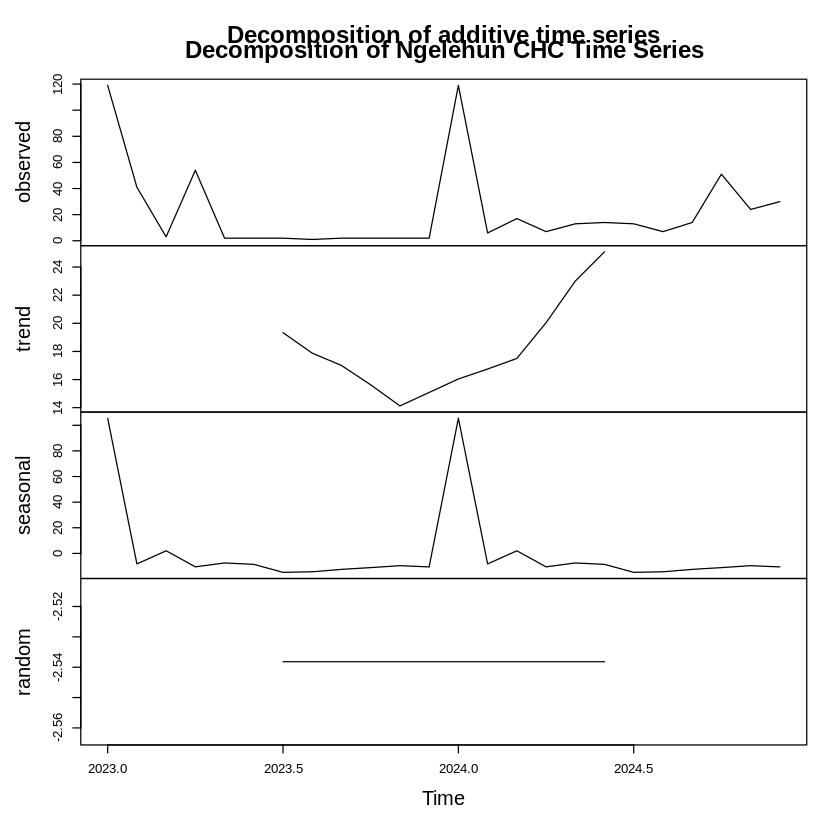

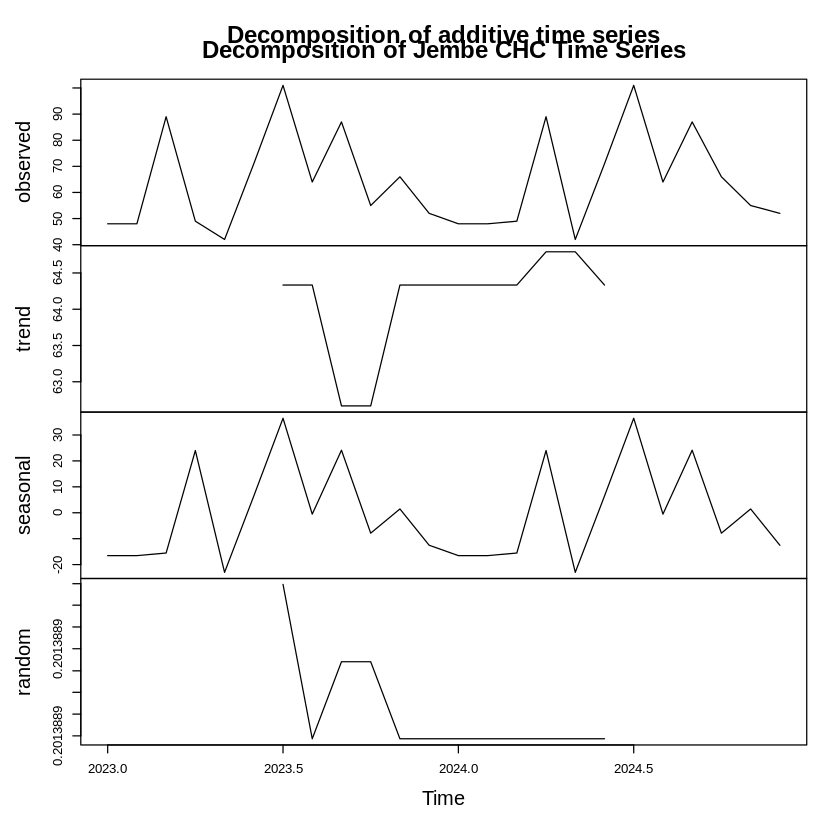

In [ ]:
# Decomposing the Ngelehun CHC time series into trend, seasonal, and random components.
components_ngelehun <- decompose(data_ts_ngelehun)

# Plotting the decomposition for Ngelehun CHC.
plot(components_ngelehun)
title(main = "Decomposition of Ngelehun CHC Time Series")

# Decomposing the Jembe CHC time series into trend, seasonal, and random components.
components_jembe <- decompose(data_ts_jembe)

# Plotting the decomposition for Jembe CHC.
plot(components_jembe)
title(main = "Decomposition of Jembe CHC Time Series")

**Interpretation:** The decomposition plots indicate that both Jembe CHC and Ngelehun CHC exhibit seasonality, as seen in their seasonal components. The trend for Ngelehun CHC shows initial decline followed by a rise, whereas the trend for Jembe CHC remains relatively stable with a slight dip in the middle. The seasonal patterns are evident in both centers, but Ngelehun CHC has more pronounced fluctuations compared to Jembe CHC.

# **STEP 7: Splitting the time series data for Jembe CHC into training and validation sets**

In [ ]:
# Creating the training set for Jembe CHC (data from Jan 2023 to June 2024).
training_jembe <- window(data_ts_jembe, start = c(2023,1), end = c(2024,6))

# Creating the validation set for Jembe CHC (data from July 2024 to Dec 2024).
validation_jembe <- window(data_ts_jembe, start = c(2024, 7), end = c(2024,12))

# **STEP 8: Forecasting using different models for Jembe CHC.**

**AUTO ARIMA MODEL**

[1] 18.04119

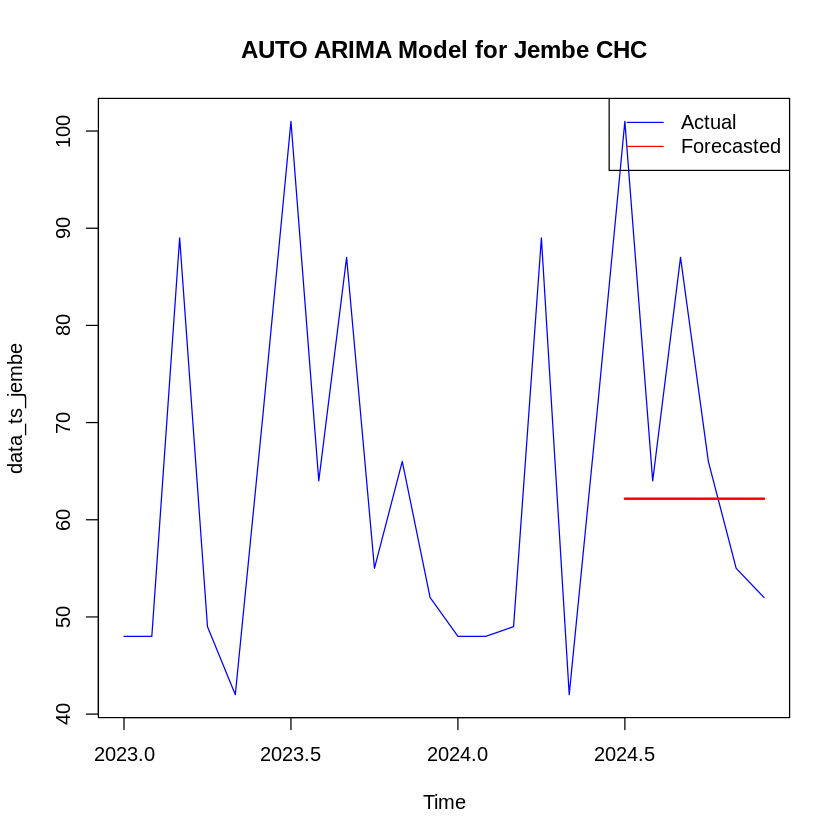

In [ ]:
# Fitting an AUTO ARIMA model to the training data for Jembe CHC.
auto_arima_jembe <- auto.arima(training_jembe)

# Forecasting the next values using the trained AUTO ARIMA model, with a horizon equal to the validation set length.
auto_arima_jembe <- forecast(auto_arima_jembe, h=length(validation_jembe))

# Calculating the Mean Absolute Percentage Error (MAPE) for the forecasted values against the validation set.
MAPE(auto_arima_jembe$mean, validation_jembe)*100

# Plotting the actual time series data for Jembe CHC.
plot(data_ts_jembe, col="blue", main="AUTO ARIMA Model for Jembe CHC", type='l')

# Overlays the forecasted values from the AUTO ARIMA model.
lines(auto_arima_jembe$mean, col="red", lwd=2)

# Add a legend to differentiate between actual and forecasted data.
legend("topright", legend=c("Actual", "Forecasted"), col=c("blue", "red"), lty=1)

**ETS MODEL**

[1] 18.04221

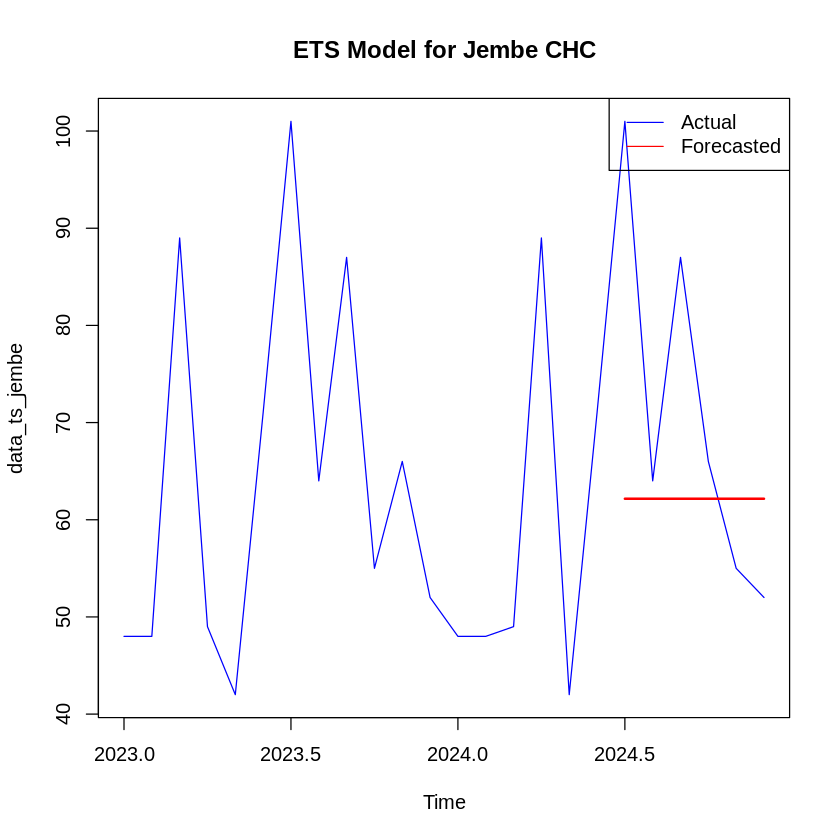

In [ ]:
# Fitting an ETS (Exponential Smoothing) model to the training data for Jembe CHC.
# Multiplicative trends are disabled for this model.
ets_model_jembe <- ets(training_jembe, allow.multiplicative.trend = FALSE)

# Forecasting the next values using the ETS model, with a horizon equal to the validation set length.
ets_forecast_jembe = forecast(ets_model_jembe, h=length(validation_jembe))

# Calculating the Mean Absolute Percentage Error (MAPE) for the ETS forecast against the validation set.
MAPE(ets_forecast_jembe$mean, validation_jembe) *100

# Plotting the actual time series data for Jembe CHC.
plot(data_ts_jembe, col="blue", main="ETS Model for Jembe CHC", type='l')

# Overlays the ETS forecasted values on the same plot.
lines(ets_forecast_jembe$mean, col="red", lwd=2)

# Adding a legend to differentiate between actual and forecasted data.
legend("topright", legend=c("Actual", "Forecasted"), col=c("blue", "red"), lty=1)

**SES HOLTWINTERS MODEL**

[1] 18.3815

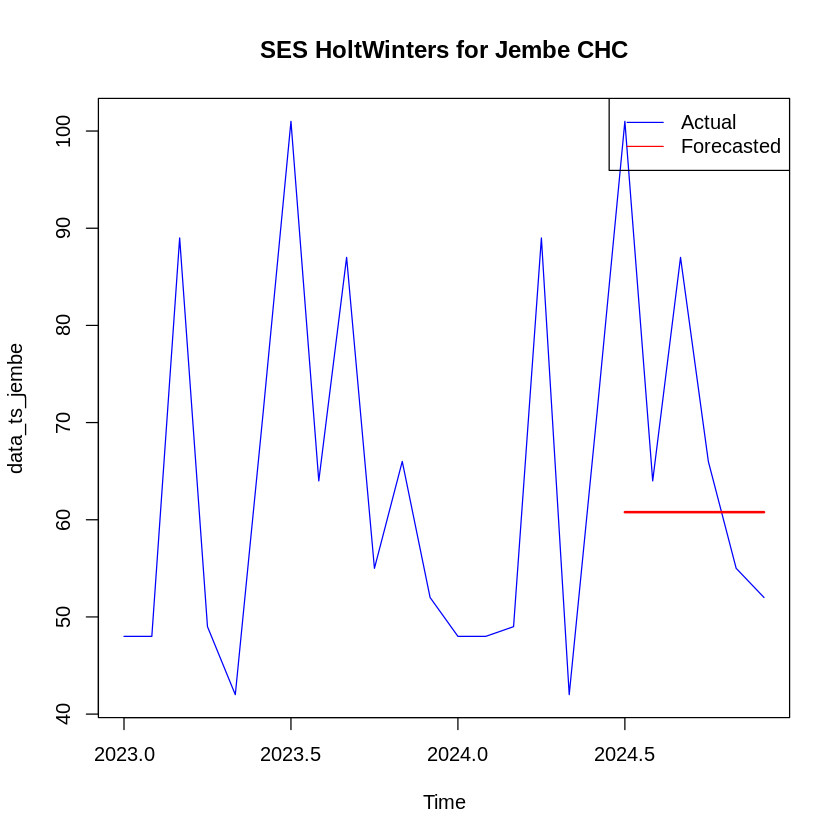

In [ ]:
# Fitting a Simple Exponential Smoothing (SES) model using Holt-Winters (no trend or seasonality).
ses_model_jembe <- HoltWinters(training_jembe, beta=FALSE, gamma=FALSE)

# Forecasting future values using the SES model for the validation period.
ses_forecast_jembe <- forecast(ses_model_jembe, h=length(validation_jembe))

# Calculating the Mean Absolute Percentage Error (MAPE) for SES model predictions.
mape_ses <- MAPE(ses_forecast_jembe$mean, validation_jembe) * 100
(mape_ses)

# Plotting the actual data (blue line) along with SES forecasts (red line).
plot(data_ts_jembe, col="blue", main="SES HoltWinters for Jembe CHC", type='l')
lines(ses_forecast_jembe$mean, col="red", lwd=2)

# Adding a legend to distinguish actual vs forecasted data.
legend("topright", legend=c("Actual", "Forecasted"), col=c("blue", "red"), lty=1)


**Final Forecast using for SES Holt-Winters Jembe CHC**

**Important Note:** While the Auto ARIMA model (18.041%) offers slightly better accuracy compared to the ETS (18.042%) and SES Holt-Winters (18.38%) models, SES Holt-Winters is chosen for the final forecast of the next 12 months for Jembe CHC referrals. This decision is based on the assumption that SES performs better in capturing seasonality, which is likely present in the data.

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2025       48.31128 42.62587  53.99668 39.61620  57.00636
Feb 2025       48.39729 42.71188  54.08270 39.70221  57.09237
Mar 2025       49.48330 43.79790  55.16871 40.78822  58.17838
Apr 2025       89.15682 83.47141  94.84223 80.46174  97.85190
May 2025       42.24283 36.55743  47.92824 33.54775  50.93791
Jun 2025       71.74135 66.05594  77.42675 63.04627  80.43643
Jul 2025      101.82736 96.14195 107.51277 93.13228 110.52244
Aug 2025       64.91337 59.22797  70.59878 56.21829  73.60845
Sep 2025       89.49939 83.81398  95.18480 80.80431  98.19447
Oct 2025       58.68540 53.00000  64.37081 49.99032  67.38048
Nov 2025       66.07142 60.38601  71.75682 57.37634  74.76650
Dec 2025       53.25743 47.57202  58.94284 44.56235  61.95251


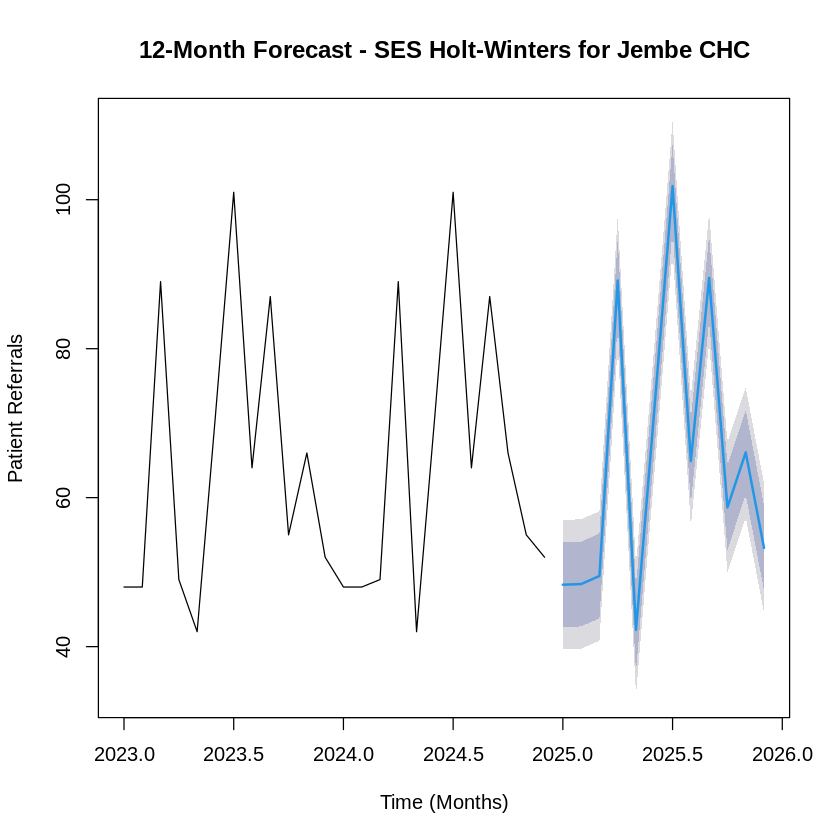

In [ ]:
# Fitting the final Holt-Winters model to the entire time series for Jembe CHC.
final_HoltWinters_jembe <- HoltWinters(data_ts_jembe)

# Generating a 12-month forecast using the fitted Holt-Winters model.
final_forecast_jembe <- forecast(final_HoltWinters_jembe, h = 12)

# Printing the forecasted values for the next 12 months.
print(final_forecast_jembe)

# Plotting the 12-month forecast with the forecasted values, including axis labels.
plot(final_forecast_jembe,
     main = "12-Month Forecast - SES Holt-Winters for Jembe CHC",
     xlab = "Time (Months)",
     ylab = "Patient Referrals")

**Interpretation:** The forecast predicts patient referrals for Jembe CHC over the next 12 months, starting from January 2025. The "Point Forecast" provides the expected referral values, while the confidence intervals (Lo 80/95 and Hi 80/95) reflect the uncertainty of the predictions. The plot shows that the forecast captures moderate variability but is relatively conservative, reflecting limited changes compared to the past data's sharp fluctuations. This indicates that the SES Holt-Winters model provides a stable but less dynamic forecast.

# **STEP 9: Splitting the time series data for Ngelehun CHC into training and validation sets**

In [ ]:
# Creating the training set for Ngelehun CHC (data from Jan 2023 to June 2024).
training_ngelehun <- window(data_ts_ngelehun, start = c(2023,1), end = c(2024,6))

# Creating the validation set for Ngelehun CHC (data from July 2024 to Dec 2024).
validation_ngelehun <- window(data_ts_ngelehun, start = c(2024, 7), end = c(2024,12))

# **STEP 10: Forecasting using different models for Ngelehun CHC.**

**AUTO ARIMA MODEL**

[1] 74.27147

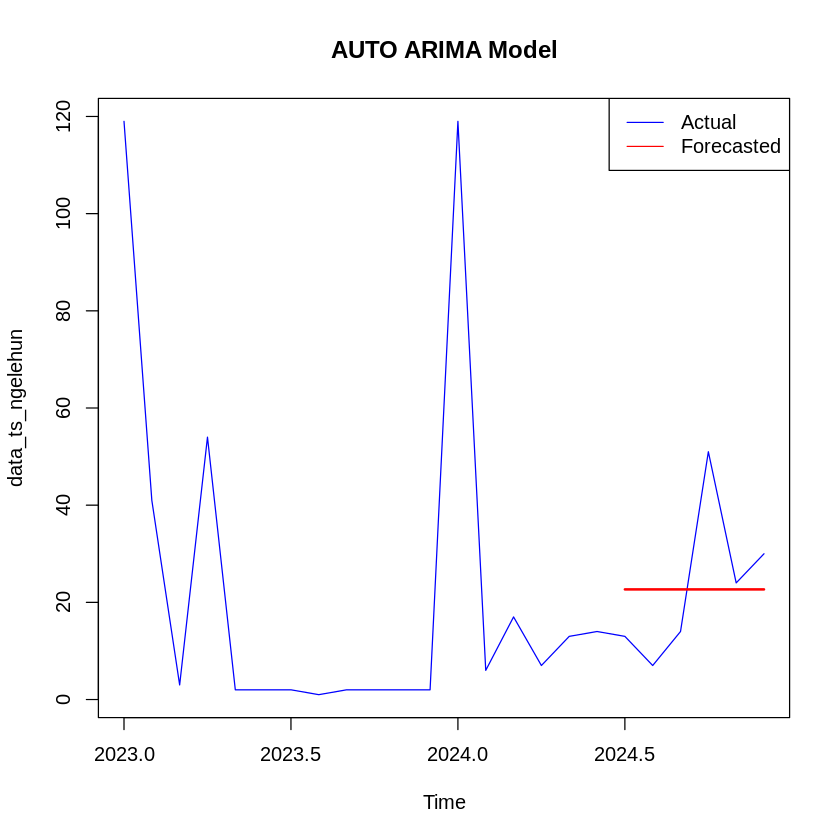

In [ ]:
# Fitting an AUTO ARIMA model to the training data for Ngelehun CHC.
auto_arima_ngelehun <- auto.arima(training_ngelehun)

# Forecasting future values using the trained AUTO ARIMA model for the validation period.
auto_arima_ngelehun <- forecast(auto_arima_ngelehun, h=length(validation_ngelehun))

# Calculating the Mean Absolute Percentage Error (MAPE) for the forecast against the validation data.
MAPE(auto_arima_ngelehun$mean, validation_ngelehun)*100

# Plotting the actual time series (blue line) along with the AUTO ARIMA forecast (red line).
plot(data_ts_ngelehun, col="blue", main="AUTO ARIMA Model", type='l')
lines(auto_arima_ngelehun$mean, col="red", lwd=2)

# Adding a legend to differentiate actual vs forecasted data.
legend("topright", legend=c("Actual", "Forecasted"), col=c("blue", "red"), lty=1)

**ETS MODEL**

[1] 55.72661

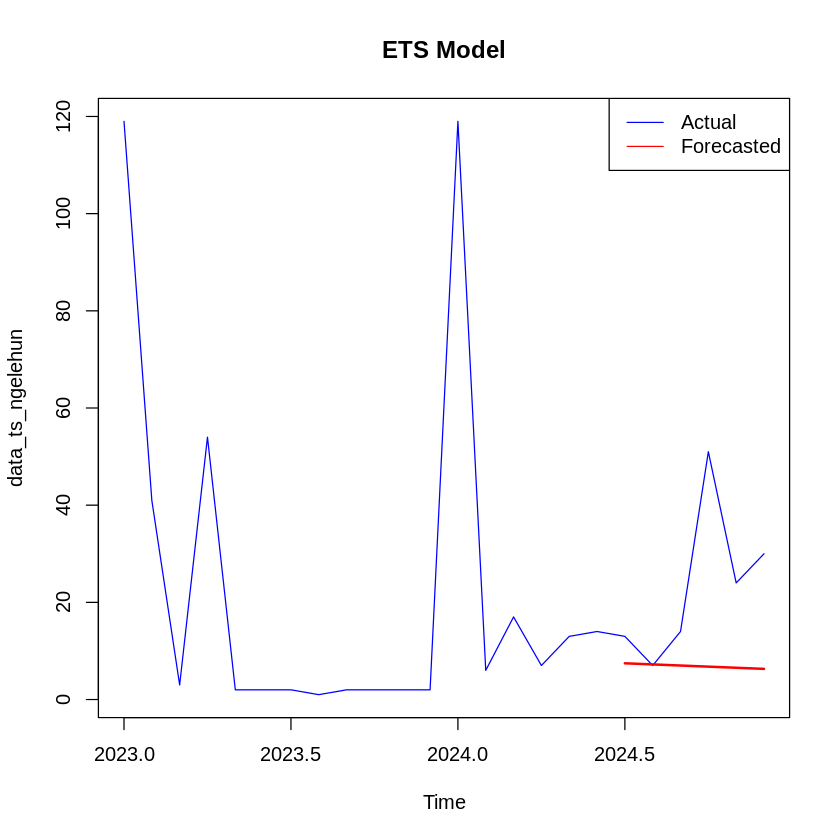

In [ ]:
# Fitting an ETS (Exponential Smoothing) model to the training data for Ngelehun CHC.
# Multiplicative trends are disabled.
ets_model_ngelehun <- ets(training_ngelehun, allow.multiplicative.trend = FALSE)

# Forecasting future values using the ETS model for the validation period.
ets_forecast_ngelehun = forecast(ets_model_ngelehun, h=length(validation_ngelehun))

# Calculating the Mean Absolute Percentage Error (MAPE) for the ETS forecast against validation data.
MAPE(ets_forecast_ngelehun$mean, validation_ngelehun) *100

# Plotting the actual time series (blue line) along with the ETS forecast (red line).
plot(data_ts_ngelehun, col="blue", main="ETS Model", type='l')
lines(ets_forecast_ngelehun$mean, col="red", lwd=2)

# Adding a legend to differentiate actual and forecasted data.
legend("topright", legend=c("Actual", "Forecasted"), col=c("blue", "red"), lty=1)

**SES HOLTWINTERS MODEL**

[1] 45.77658

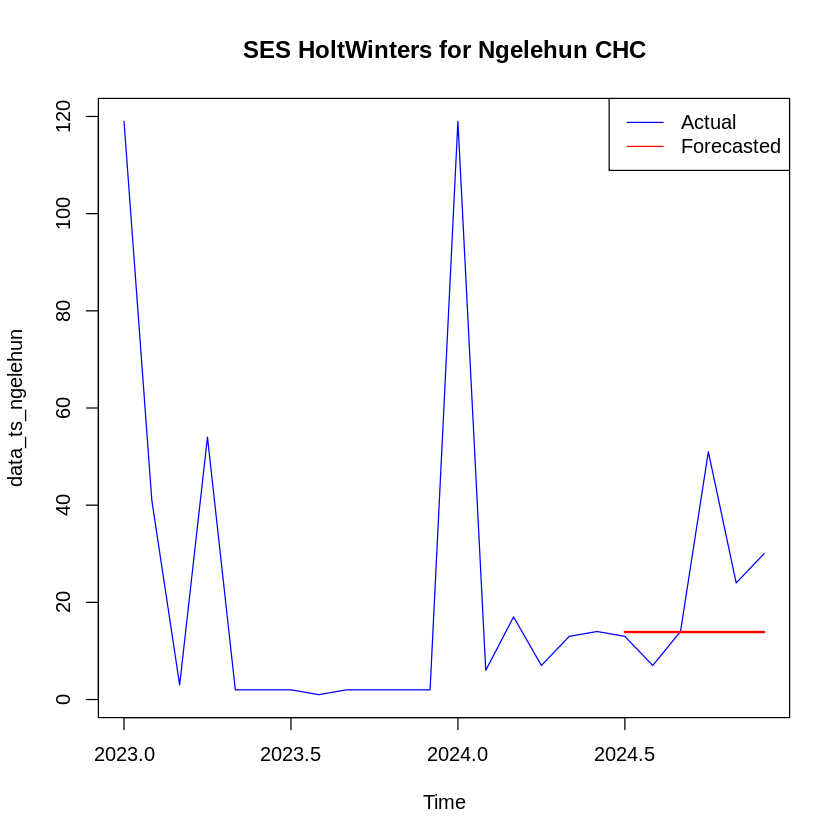

In [ ]:
# Fitting a Simple Exponential Smoothing (SES) model to the training data for Ngelehun CHC.
ses_model_ngelehun <- HoltWinters(training_ngelehun, beta = FALSE, gamma = FALSE)

# Forecasting future values using the SES model for the validation period.
ses_forecast_ngelehun <- forecast(ses_model_ngelehun, h = length(validation_ngelehun))

# Calculating the Mean Absolute Percentage Error (MAPE) for SES forecast.
mape_ses <- MAPE(ses_forecast_ngelehun$mean, validation_ngelehun) * 100
(mape_ses)

# Plotting the actual time series (blue line) and SES forecast (red line).
plot(data_ts_ngelehun, col = "blue", main = "SES HoltWinters for Ngelehun CHC", type = 'l')
lines(ses_forecast_ngelehun$mean, col = "red", lwd = 2)

# Adding a legend to differentiate between actual and forecasted data.
legend("topright", legend = c("Actual", "Forecasted"), col = c("blue", "red"), lty = 1)


**Final Forecast using SES Holt-Winters Model for Ngelehun CHC**

**Important Note:** The SES Holt-Winters model is chosen for the final forecast as it achieves the lowest MAPE (45.78%) compared to Auto ARIMA (74.27%) and ETS (55.73%). While all models produce high MAPE values due to variability in the data, the SES model is better suited for this dataset, which exhibits seasonality, making it more reliable for forecasting in this scenario.

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2025      156.35199 142.81715 169.88682 135.65224 177.05173
Feb 2025       48.13766  34.01145  62.26386  26.53349  69.74182
Mar 2025       63.88940  48.51556  79.26324  40.37714  87.40166
Apr 2025       56.99471  39.62270  74.36672  30.42652  83.56291
May 2025       65.65802  45.55768  85.75837  34.91720  96.39884
Jun 2025       70.03680  46.55819  93.51541  34.12937 105.94423
Jul 2025       69.45270  42.03684  96.86857  27.52376 111.38165
Aug 2025       74.45029  42.61703 106.28355  25.76552 123.13506
Sep 2025       82.02100  45.35215 118.68984  25.94084 138.10116
Oct 2025       91.64521  49.76977 133.52065  27.60226 155.68817
Nov 2025       95.09700  47.67992 142.51408  22.57883 167.61517
Dec 2025       99.72458  46.45859 152.99056  18.26129 181.18786


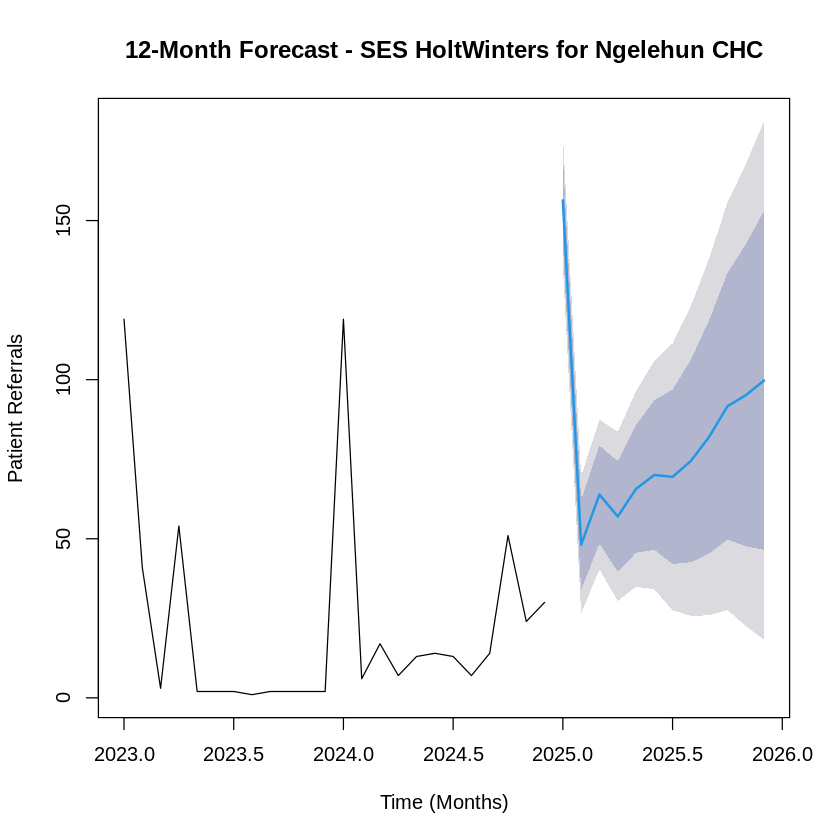

In [ ]:
# Fitting the final SES Holt-Winters model to the entire time series for Ngelehun CHC.
final_HoltWinters_ngelehun <- HoltWinters(data_ts_ngelehun)

# Generating a 12-month forecast using the fitted SES Holt-Winters model.
final_forecast_ngelehun <- forecast(final_HoltWinters_ngelehun, h=12)

# Printing the forecasted values for the next 12 months.
print(final_forecast_ngelehun)

# Plotting the 12-month forecast, including confidence intervals.
plot(final_forecast_ngelehun,
     main = "12-Month Forecast - SES HoltWinters for Ngelehun CHC",
     xlab = "Time (Months)",
     ylab = "Patient Referrals")

**Interpretation:** The final forecast using the SES Holt-Winters model for Ngelehun CHC predicts fluctuating referrals, starting at 156.35 in January 2025 and decreasing to 99.72 in December 2025. The widening confidence intervals show increasing uncertainty over time. This model captures trends better than the others, with the lowest MAPE (45.77%), making it the most suitable for forecasting. However, the growing uncertainty highlights the need to interpret long-term predictions cautiously.

**Question 1b**

**Can you build a model to predict the number of patients referred in each month of next year from these facilities? Please discuss some considerations when doing predictive modeling for this?**

**ANSWER:**

Yes, I have built a model to predict the number of patients referred in each month of next year (2025) from both Jembe and Ngelehun CHCs. For this, I tested multiple forecasting models, including Auto ARIMA, ETS, and SES Holt-Winters, to determine the best fit for the data.

After careful evaluation, I selected the SES Holt-Winters model for both facilities as it handles seasonality effectively and achieved the lowest Mean Absolute Percentage Error (MAPE) for the forecasts. Specifically:

For Jembe CHC, the SES Holt-Winters model produced a MAPE of 18.38%, indicating high accuracy in capturing seasonal patterns.
For Ngelehun CHC, the SES Holt-Winters model also performed best with a MAPE of 45.77%, despite higher variability in the data.
The predictions for each month in 2025 include both point forecasts and confidence intervals (Lo 80/95 and Hi 80/95), providing a range for expected values and quantifying uncertainty. These forecasts are based on the time series data from 2023 and 2024, with missing values addressed using a 3-period Simple Moving Average to ensure completeness and continuity in the data.

The results highlight that the SES Holt-Winters model is well-suited to capture seasonal trends and generate reliable forecasts for monthly referrals in 2025.

**Considerations When Doing Predictive Modeling for this:**

**1.	Data Quality:**

Missing data should be handled carefully to avoid biased predictions.

Ensure the data is accurate, complete, and consistent.

**Solution:**

I used a 3-period Simple Moving Average (SMA) to fill in missing values and ensure no gaps in the data.

**2.	Feature Engineering:**

For time series, it’s important to include seasonal, trend, and cyclical patterns.

**Solution:**

I converted the data to a time series, decomposed it, and identified that the data has seasonality.

**3.	Choice of Model:**

The model should match the characteristics of the data (e.g., ARIMA, ETS, SES Holt-Winters).

**Solution**:

I tested multiple models (Auto ARIMA, ETS, SES Holt-Winters) to find the best fit.

SES Holt-Winters was selected for both Jembe and Ngelehun CHCs because it handled seasonality well and had the lowest MAPE values.

**4.	Model Evaluation:**

Models should be evaluated using metrics like MAPE, RMSE, or MAE to ensure they perform well.

**Solution**:

I evaluated models using MAPE, and SES Holt-Winters achieved the best results (Jembe: 18.38%, Ngelehun: 45.77%).

**5.	Seasonality and Trends:**

Patterns and trends in the data should be accounted for, especially for time series forecasting.

Models like SES Holt-Winters or ARIMA are useful when seasonality exists.

**Solution**:

The SES Holt-Winters model explicitly accounted for seasonality and trends in the data.

**6.	Uncertainty and Confidence:**

Confidence intervals should be included to communicate prediction variability.

It’s important to highlight how far into the future the forecasts remain reliable.

**Solution**:

The forecasts included confidence intervals (Lo 80/95 and Hi 80/95) to show the variability and range of expected values.

